### Importing libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [3]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.
%matplotlib inline

In [4]:
#Defining path
path= r'/Users/prateeksharma/Documents/House prices'

In [5]:
# Import the data
df = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data','Exploring relationships.pkl'))

In [6]:
df.shape

(35759, 13)

In [7]:
df.head()

,City,Price,Number_Beds,Number_Baths,Province,Population,Latitude,Longitude,Median_Family_Income,Price_flag,Income_flag,Population_category,Province_short
0,Toronto,779900,3,2,Ontario,5647656,43.7417,-79.3733,97000,Average price,Mid Income,>=1M,ON
1,Toronto,799999,3,1,Ontario,5647656,43.7417,-79.3733,97000,Average price,Mid Income,>=1M,ON
2,Toronto,799900,2,2,Ontario,5647656,43.7417,-79.3733,97000,Average price,Mid Income,>=1M,ON
3,Toronto,1200000,4,2,Ontario,5647656,43.7417,-79.3733,97000,High price,Mid Income,>=1M,ON
4,Toronto,668800,1,1,Ontario,5647656,43.7417,-79.3733,97000,Average price,Mid Income,>=1M,ON


In [8]:
df.columns

Index(['City', 'Price', 'Number_Beds', 'Number_Baths', 'Province',
       'Population', 'Latitude', 'Longitude', 'Median_Family_Income',
       'Price_flag', 'Income_flag', 'Population_category', 'Province_short'],
      dtype='object')

In [9]:
# Create a subset to exclude categorical values columns.
sub = df[['Price', 'Number_Beds', 'Number_Baths',
         'Median_Family_Income']]

### The elbow technique

In [10]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [11]:
score = [kmeans[i].fit(sub).score(sub) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/Users/prateeksharma/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/prateeksharma/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/prateeksharma/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/prateeksharma/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default valu

[-3.69646243805505e+16,
 -1.8707379202550784e+16,
 -1.0253367825657844e+16,
 -6887465262202972.0,
 -4844921338968659.0,
 -3575679727515221.5,
 -2674314239994225.5,
 -2061502906729952.8,
 -1639049009137778.2]

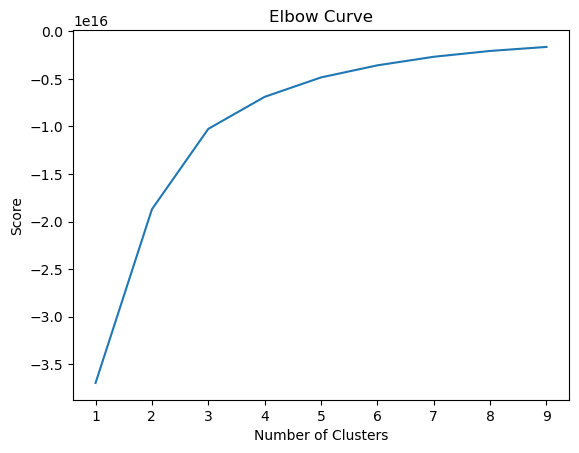

In [12]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In this example, there's a large jump from two to three on the x-axis, but after that, the curve straightens out. This means that the optimal count for the clusters is three.

## k-means clustering

In [13]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 3) 
n_init_value = 10  # Set the value for n_init (can be adjusted as needed)

In [14]:
# Fit the k-means object to the data.
kmeans.fit(sub)

/Users/prateeksharma/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [15]:
sub['clusters'] = kmeans.fit_predict(sub)

/Users/prateeksharma/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/1h/3sdj2tc1297dytyhjybm86l00000gn/T/ipykernel_5474/3683309691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['clusters'] = kmeans.fit_predict(sub)


In [16]:
sub.head()

,Price,Number_Beds,Number_Baths,Median_Family_Income,clusters
0,779900,3,2,97000,0
1,799999,3,1,97000,0
2,799900,2,2,97000,0
3,1200000,4,2,97000,0
4,668800,1,1,97000,0


In [17]:
sub['clusters'].value_counts()

clusters
0    30299
2     5164
1      296
Name: count, dtype: int64

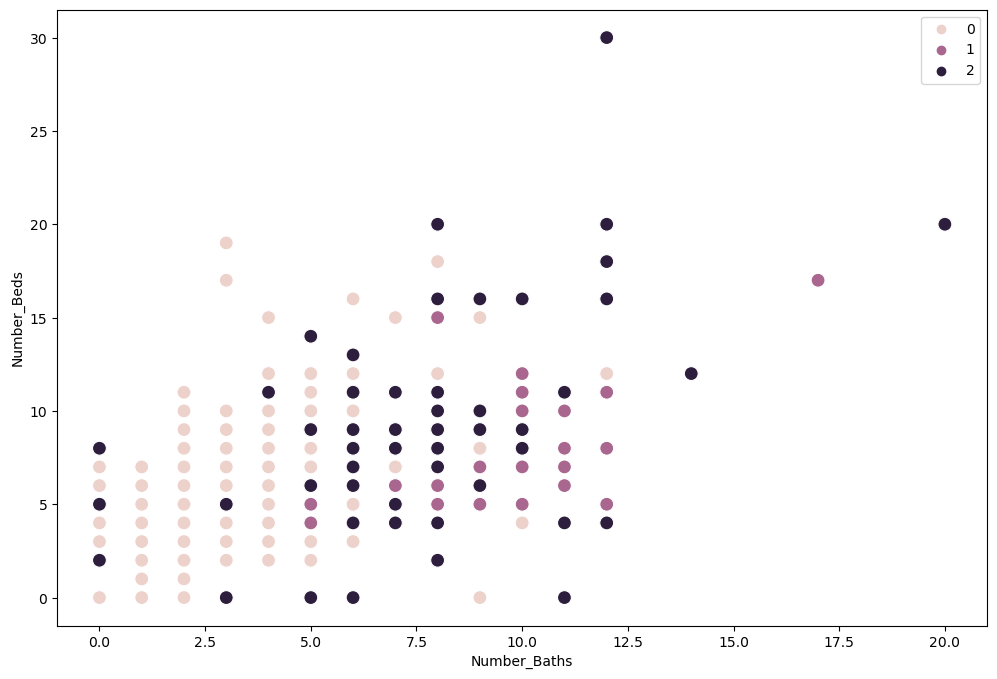

In [18]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Number_Baths'], y=df['Number_Beds'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Number_Baths') # Label x-axis.
plt.ylabel('Number_Beds') # Label y-axis.
plt.show()

Pink clutter (coded as 0 in the legend) is the most populated cluster and tends to have a low number of bathrooms and bed. 
The second cluster is dark purple (coded as 2 in the legend)includes points with higher number of beds and a somewhat higher number of bathrooms than the pink cluster. 

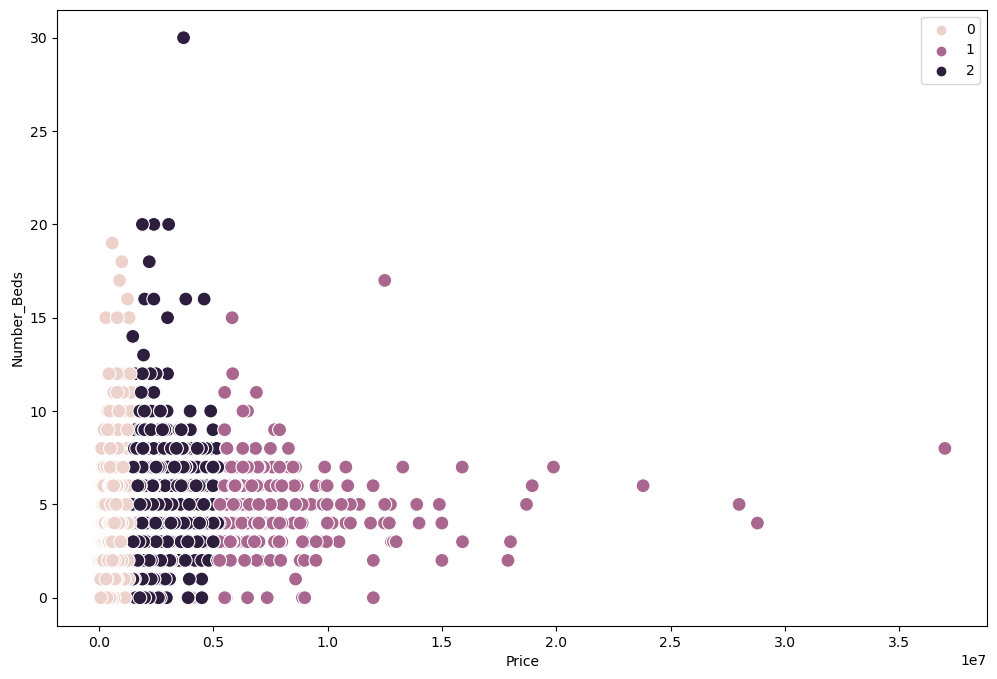

In [20]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Price'], y=df['Number_Beds'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Price') # Label x-axis.
plt.ylabel('Number_Beds') # Label y-axis.
plt.show()

Purple cluster has the highest level of house prices followed by dark purple cluster while the pink clusters tends to have lower levels on these indicators.

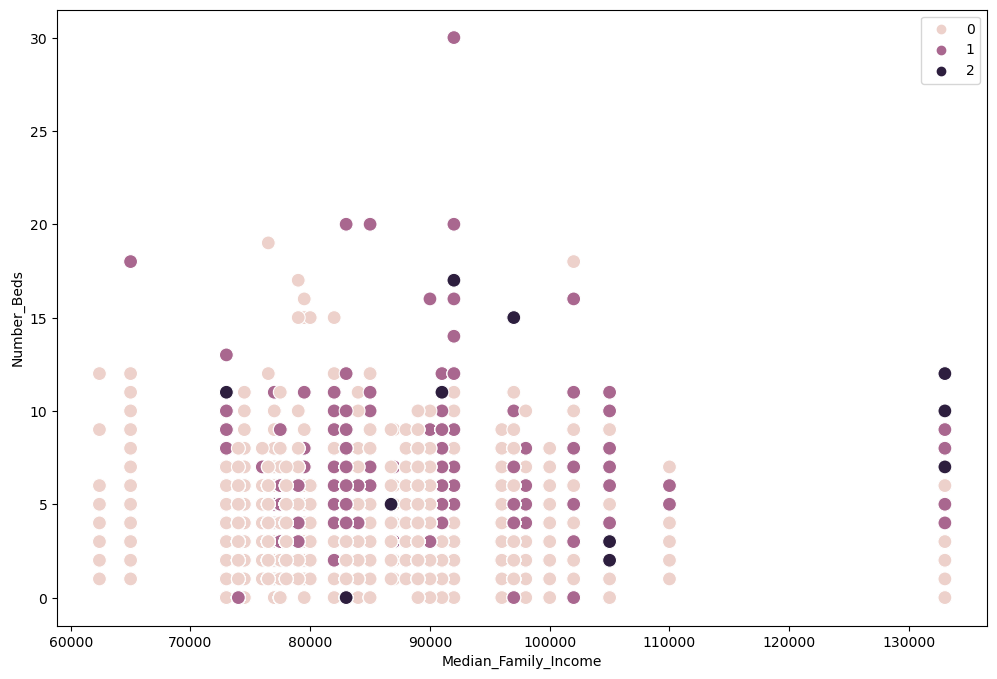

In [20]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Median_Family_Income'], y=df['Number_Beds'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Median_Family_Income') # Label x-axis.
plt.ylabel('Number_Beds') # Label y-axis.
plt.show()

this doesnt really look like a useful insight and possibly need further exploration 

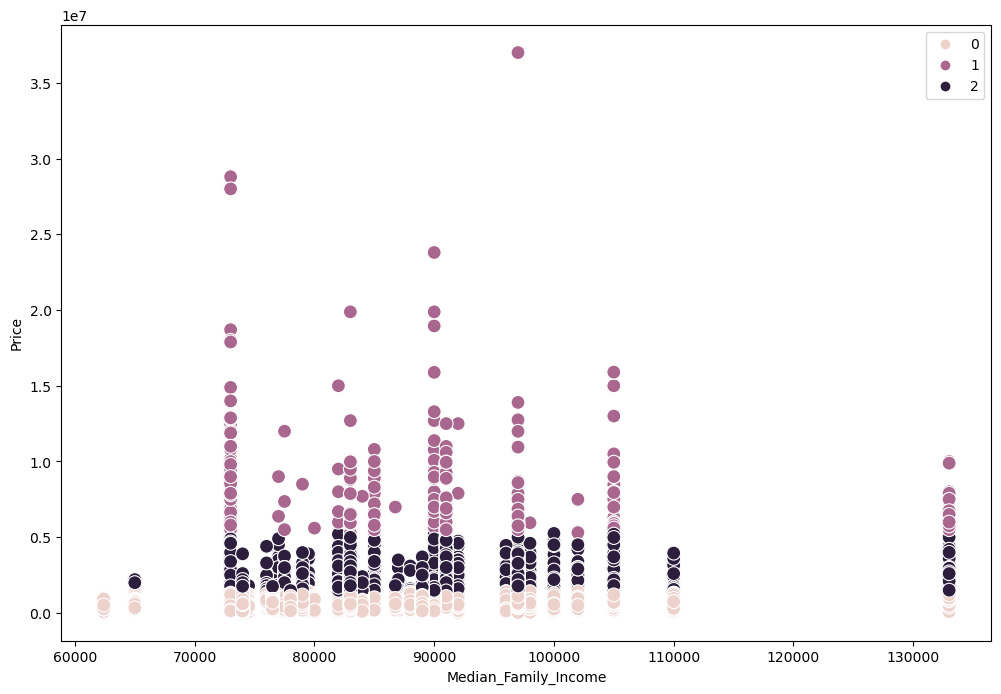

In [21]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Median_Family_Income'], y=df['Price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Median_Family_Income') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

Pink cluster contains data points that are spread across the lower end of the income scale and includes the lowest-priced houses. Dark purple represents a middle ground between the other 2 clusters. Dark purple contains data points that are higher on the Price axis and are also spread across a wide range of Median_Family_Income values. 

In [21]:
df.loc[sub['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[sub['clusters'] == 1, 'cluster'] = 'purple'
df.loc[sub['clusters'] == 0, 'cluster'] = 'pink'

In [22]:
df.groupby('cluster').agg({'Price':['mean', 'median'], 
                         'Number_Baths':['mean', 'median'], 
                         'Number_Beds':['mean', 'median'],
                          'Median_Family_Income':['mean', 'median']})

Price            Number_Baths        Number_Beds         \
                     mean     median         mean median        mean median   
cluster                                                                       
dark purple  8.314763e+06  6998900.0     5.101351    5.0    4.783784    5.0   
pink         6.561217e+05   629000.0     2.290076    2.0    3.050398    3.0   
purple       2.197905e+06  1899988.0     3.770333    4.0    4.497095    4.0   

            Median_Family_Income           
                            mean   median  
cluster                                    
dark purple         89888.533784  90000.0  
pink                89411.895145  89000.0  
purple              90988.575910  90000.0

Pink cluster has the most consistent stats overall as it has the smallest differences between the mean and median across all variables. Purple and dark purple cluster shows comparitively similar differences. 

This finding can be leveraged in future analytics pipelines for targeted marketing strategies, investment analysis, pricing models, predictive analytics, and urban planning and development. Understanding the stability and predictability of properties within the "pink" cluster can guide decision-making processes, enhance strategic planning, and lead to more informed outcomes in the real estate and related industries.